## Collaborative Filtering

In [279]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import Callback


In [280]:
user = pd.read_csv("../data/datasets/user.csv")
user

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20
...,...,...,...
295,296,"Lampung, Sumatera Selatan",31
296,297,"Palembang, Sumatera Selatan",39
297,298,"Bogor, Jawa Barat",38
298,299,"Sragen, Jawa Tengah",27


In [281]:
rat = pd.read_csv("../data/datasets/tourism_rating.csv")
rat

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [282]:
update = pd.read_csv('../data/datasets/updated/tourism_with_id_updated.csv')
update

,Place_Id,Place_Name,Description,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,new_category
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,"['Budaya', 'Keluarga']"
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,['Budaya']
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,"['Hiburan', 'Keluarga']"
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,"['Budaya', 'Hiburan']"
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,"['Petualangan', 'Hiburan']"
...,...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Surabaya,2000,4.4,45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906,"['Sejarah', 'Budaya']"
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Surabaya,0,4.6,NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,"['Alam', 'Relaksasi']"
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Surabaya,0,4.4,45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938,"['Alam', 'Hiburan']"
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Surabaya,0,4.6,NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,"['Alam', 'Relaksasi']"


In [283]:
user_ids = rat['User_Id'].unique().tolist()
print('list User_Id : ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User_Id : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('decode angka ke User_Id : ', user_encoded_to_user)

list User_Id :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 2

In [284]:
place_ids = rat['Place_Id'].unique().tolist()
print('list Place_Id : ', place_ids)

place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}
print('encoded Place_Id : ', place_to_place_encoded)

place_encoded_to_place = {i: x for i, x in enumerate(place_ids)}
print('decode angka ke Place_Id : ', place_encoded_to_place)

list Place_Id :  [179, 344, 5, 373, 101, 312, 258, 20, 154, 393, 103, 208, 89, 405, 41, 336, 67, 292, 222, 76, 428, 15, 246, 265, 21, 328, 307, 302, 48, 147, 2, 322, 23, 85, 371, 78, 111, 107, 185, 413, 389, 437, 105, 176, 407, 281, 167, 384, 426, 390, 367, 166, 18, 321, 262, 223, 17, 319, 310, 421, 202, 283, 250, 118, 54, 70, 33, 227, 86, 249, 131, 382, 193, 104, 24, 128, 134, 228, 237, 100, 198, 50, 376, 268, 242, 82, 348, 409, 88, 4, 377, 43, 91, 44, 14, 406, 383, 229, 290, 294, 309, 74, 97, 138, 436, 395, 300, 68, 55, 434, 9, 151, 61, 159, 397, 391, 301, 143, 27, 190, 346, 381, 368, 433, 420, 335, 115, 334, 219, 178, 266, 92, 64, 102, 257, 243, 116, 359, 121, 385, 398, 119, 298, 410, 224, 379, 255, 269, 213, 126, 192, 183, 129, 303, 296, 99, 148, 13, 247, 31, 77, 158, 306, 98, 235, 45, 173, 275, 25, 130, 164, 267, 56, 30, 238, 402, 196, 417, 304, 206, 211, 28, 264, 403, 253, 331, 188, 416, 378, 233, 95, 204, 225, 341, 145, 36, 168, 12, 280, 236, 42, 90, 75, 63, 205, 234, 284, 230, 

In [285]:
rat

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [286]:
collfil = rat.copy()

In [287]:
collfil['user'] = collfil['User_Id'].map(user_to_user_encoded)
collfil['place'] = collfil['Place_Id'].map(place_to_place_encoded)

In [288]:
num_users = len(user_to_user_encoded)
num_places = len(place_encoded_to_place)

collfil['rating'] = collfil['Place_Ratings'].values.astype(np.float32)

min_rating = min(collfil['rating'])
max_rating = max(collfil['rating'])

print(f'Users Count: {num_users}')
print(f'Places Count: {num_places}')
print(f'Min rating: {min_rating}')
print(f'Max rating: {max_rating}')

Users Count: 300
Places Count: 437
Min rating: 1.0
Max rating: 5.0


In [289]:
collfil

,User_Id,Place_Id,Place_Ratings,user,place,rating
0,1,179,3,0,0,3.0
1,1,344,2,0,1,2.0
2,1,5,5,0,2,5.0
3,1,373,3,0,3,3.0
4,1,101,4,0,4,4.0
...,...,...,...,...,...,...
9995,300,425,2,299,324,2.0
9996,300,64,4,299,132,4.0
9997,300,311,3,299,348,3.0
9998,300,279,4,299,290,4.0


In [290]:
x = collfil[['user', 'place']].values

y = collfil['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [291]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_places, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_places = num_places
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.places_embedding = layers.Embedding( # layer embeddings places
        num_places,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.places_bias = layers.Embedding(num_places, 1) # layer embedding places bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    places_vector = self.places_embedding(inputs[:, 1]) # memanggil layer embedding 3
    places_bias = self.places_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_places = tf.tensordot(user_vector, places_vector, 2) 
 
    x = dot_user_places + user_bias + places_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [292]:
model = RecommenderNet(num_users, num_places, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0004),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [293]:
class myCallback(Callback):    
    def on_epoch_end(self, epoch, logs=None):
        print("Checking val_root_mean_squared_error at end of epoch...")
        if logs['val_root_mean_squared_error'] <= 0.25:
               self.model.stop_training = True

In [294]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 100,
    validation_data = (x_test, y_test),
    callbacks = [myCallback()]
)

Epoch 1/100


210/210 [==============================] - 1s 2ms/step - loss: 0.7004 - root_mean_squared_error: 0.3494 - val_loss: 0.7017 - val_root_mean_squared_error: 0.3531
Epoch 2/100
210/210 [==============================] - 0s 1ms/step - loss: 0.6966 - root_mean_squared_error: 0.3467 - val_loss: 0.7011 - val_root_mean_squared_error: 0.3527
Epoch 3/100
210/210 [==============================] - 0s 1ms/step - loss: 0.6946 - root_mean_squared_error: 0.3453 - val_loss: 0.7012 - val_root_mean_squared_error: 0.3527
Epoch 4/100
210/210 [==============================] - 0s 2ms/step - loss: 0.6946 - root_mean_squared_error: 0.3454 - val_loss: 0.7011 - val_root_mean_squared_error: 0.3527
Epoch 5/100
210/210 [==============================] - 0s 2ms/step - loss: 0.6922 - root_mean_squared_error: 0.3436 - val_loss: 0.7009 - val_root_mean_squared_error: 0.3525
Epoch 6/100
210/210 [==============================] - 0s 1ms/step - loss: 0.6924 - root_mean_squared_error: 0.3438 - val_loss: 0.7009 - val_root_m

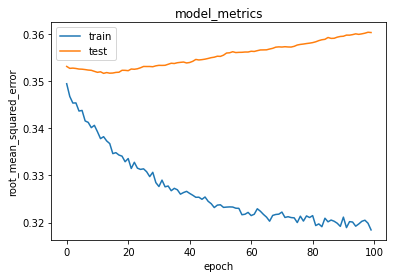

In [295]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

## Places Recommendation

In [296]:
place_df = update[['Place_Id','Place_Name','new_category','Rating','Price']]
place_df.columns = ['id','place_name','category','rating','price']
df = rat.copy()
print(df.dtypes)

User_Id          int64
Place_Id         int64
Place_Ratings    int64
dtype: object


In [297]:
user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

In [298]:
# Membuat data lokasi yang belum dikunjungi user
place_not_rated = place_df[~place_df['id'].isin(
    place_visited_by_user.Place_Id.values)]['id']
place_not_rated = list(
    set(place_not_rated).intersection(set(place_to_place_encoded.keys()))
)

place_not_rated = [
    [place_to_place_encoded.get(x)] for x in place_not_rated]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_rated), place_not_rated)
)

In [299]:
ratings = model.predict(user_place_array).flatten()
top_ratings_indices = ratings.argsort()[-5:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_rated[x][0]) for x in top_ratings_indices
]
 
# print('Daftar rekomendasi untuk: {}'.format('User ' + str(user_id)))
# print('===' * 15,'\n')
# print('----' * 15)
# print('Tempat dengan rating wisata paling tinggi dari user')
# print('----' * 15)
 
top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)
 
place_df_rows = place_df[place_df['id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.place_name, ':', row.category)

# print('')
# print('----' * 15)
# print('Top 5 place recommendation')
# print('----' * 15)
 
cf_recommendation = place_df[place_df['id'].isin(recommended_place_ids)]



13/13 [==============================] - 0s 653us/step
Skyrink - Mall Taman Anggrek : ['Hiburan', 'Olahraga']
Alive Museum Ancol : ['Hiburan', 'Keluarga']
Masjid Agung Trans Studio Bandung : ['Budaya']
Taman Pandanaran : ['Budaya']
Taman Flora Bratang Surabaya : ['Alam', 'Relaksasi']


In [300]:
cf_recommendation

,id,place_name,category,rating,price
96,97,Monumen Yogya Kembali,['Budaya'],4.5,15000
138,139,Puncak Gunung Api Purba - Nglanggeran,"['Alam', 'Petualangan']",4.7,10000
182,183,Jogja Bay Pirates Adventure Waterpark,"['Hiburan', 'Keluarga']",4.4,150000
195,196,Pantai Ngrenehan,"['Alam', 'Romantis', 'Keluarga']",4.4,3000
299,300,Sanghyang Heuleut,"['Alam', 'Petualangan']",4.4,10000


In [301]:
cf_recommendation.drop(["place_name", "category", "rating", "price"], axis=1, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_29140\2547154286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cf_recommendation.drop(["place_name", "category", "rating", "price"], axis=1, inplace=True)


In [302]:
cf_recommendation.rename(columns={'id': 'Place_Id'}, inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_29140\1174431504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cf_recommendation.rename(columns={'id': 'Place_Id'}, inplace=True)


In [303]:
def give_scoring(df):
    # this function will return score for each user recommended items
    df['score'] = 1
    return df

In [304]:
cf_recommendation = give_scoring(cf_recommendation)

C:\Users\HP\AppData\Local\Temp\ipykernel_29140\2018131887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'] = 1


In [305]:
cf_recommendation

,Place_Id,score
96,97,1
138,139,1
182,183,1
195,196,1
299,300,1


In [306]:
cf_recommendation.to_csv('../data/output/cf_recommendation.csv', index=False)